# Human Activity recognition !

<h2></h2>
<center><img src=https://images.unsplash.com/photo-1520895653685-c739b6db8fce?ixlib=rb-1.2.1&q=85&fm=jpg&crop=entropy&cs=srgb&w=4800"></center>
    
<h2></h2>

The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors.
    
[Dataset Link](https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones#train.csv)

### let's Import Libraries

In [1]:
# import first
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# change the style from the very beging
plt.style.use('ggplot')
%matplotlib inline


C:\Users\DR.LAP\Anaconda3\anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### let's import our dataset.

In [2]:
train_df = pd.read_csv("Human_Activity_Recognition/data/train.csv")
test_df= pd.read_csv("Human_Activity_Recognition/data/test.csv")
dataset = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)


train_df.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


### let's take a look on it:

#### Frequency distribution of activities:

In [3]:
#Frequency distribution of activities
freq_train = pd.crosstab(index=train_df["Activity"],columns="count")    

freq_train.sort_values('count', ascending=False)

col_0,count
Activity,
LAYING,1407
STANDING,1374
SITTING,1286
WALKING,1226
WALKING_UPSTAIRS,1073
WALKING_DOWNSTAIRS,986


#### the size of our data:

In [4]:
print('Train_df size :',train_df.shape)
print('Test_df size :',test_df.shape)

Train_df size : (7352, 563)
Test_df size : (2947, 563)


#### some information about our dataset:

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 44.2+ MB


In [6]:
dataset.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,16.146422
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898,8.679067
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880,9.000000
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882,17.000000
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970,24.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


### Cleaning and preprocessing:

#### Dropping Unneeded data:

In [7]:
train_df=train_df.drop(['subject'],axis=1)
test_df=test_df.drop(['subject'],axis=1)


#### Handling the missing data


In [8]:
print('Null Values in our Dataset are = ',dataset.isna().sum().sum())


Null Values in our Dataset are =  0


#### Great! there are No missing values

### Let's build our SVM model

In [9]:
# Seperating Predictors and Outcome values from train and test sets
X_train = train_df.drop(['Activity'],axis=1)
Y_train = train_df['Activity']
X_test = test_df.drop(['Activity'],axis=1)
Y_test = test_df['Activity']


In [17]:
# Scaling the Train and Test feature-set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
from sklearn.svm import SVC
classifier = SVC(kernel ='rbf', random_state = 0)
classifier.fit(X_train_scaled, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

#### Confusion Matrix

Score= 0.9518154054971157


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2c80bb8bb08>)

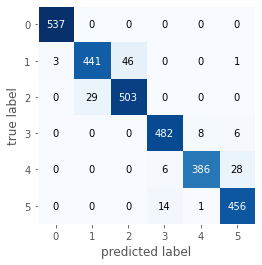

In [23]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(Y_test, classifier.predict(X_test_scaled))
print('Score=',classifier.score(X_test_scaled, Y_test))
plot_confusion_matrix(cm)

### let's build our Logistic Regression model


In [16]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 0)
logistic.fit(X_train_scaled, Y_train)

C:\Users\DR.LAP\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
from sklearn.metrics import f1_score

y_pred=logistic.predict(X_test_scaled)

f1_current= f1_score(Y_test,y_pred,average='macro')
f1_current

0.9539152110515033

#### Well,, we need to evaluate that model !
#### Let's see the confusion Matrix

0.9541907024092298


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2c80ada7a88>)

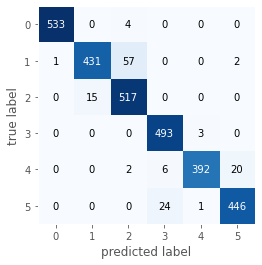

In [26]:
cm = confusion_matrix(Y_test, logistic.predict(X_test_scaled))
print(logistic.score(X_test_scaled, Y_test))
plot_confusion_matrix(cm)

In [ ]:
logistic.predict([[]])

#### let's get the accuracy

In [26]:
print(logistic.score(X_train_scaled, Y_train))
print(logistic.score(X_test_scaled, Y_test))


0.9963275299238302
0.9541907024092298


### K-Nearest-Neighbor classification 

In [36]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

accs_test = []
accs_train = []
ks = np.linspace(1, 20, 20)
for K in ks:
    classifier = KNeighborsClassifier(n_neighbors=int(K))
    classifier.fit(X_train_scaled, Y_train)
    cm = confusion_matrix(Y_test, classifier.predict(X_test_scaled))
    accs_train.append(classifier.score(X_train_scaled, Y_train))
    accs_test.append(classifier.score(X_test_scaled, Y_test))

Text(0.5, 1.0, 'accuracy versus K')

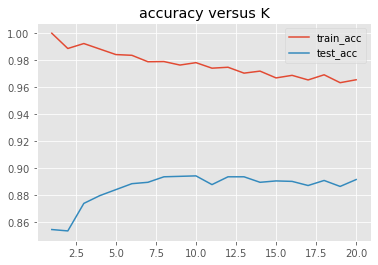

In [37]:
plt.plot(ks, accs_train, label='train_acc')
plt.plot(ks, accs_test, label='test_acc')
plt.legend()
plt.title("accuracy versus K")

In [27]:
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train_scaled, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

#### take a look at the confusion matrix

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x22e826fa048>)

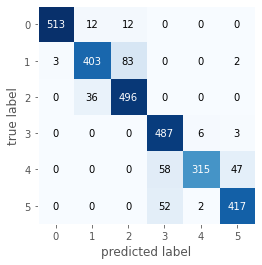

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, classifier.predict(X_test_scaled))
plot_confusion_matrix(cm)

In [29]:
print("model accuracy on train: {:.4f}".format(classifier.score(X_train_scaled, Y_train)))
print("model accuracy on test: {:.4f}".format(classifier.score(X_test_scaled, Y_test)))

model accuracy on train: 0.9766
model accuracy on test: 0.8928


## Naive Bayes classification 

### GaussianNB classifier

In [31]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_scaled, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

#### Let's see the confusion matrix 

0.7461915125136017
0.7702748557855447


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x22e82a11a88>)

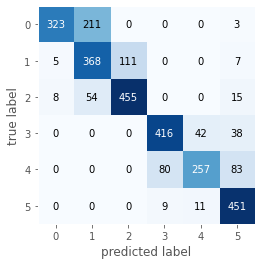

In [32]:
cm = confusion_matrix(Y_test, classifier.predict(X_test_scaled))
print(classifier.score(X_train_scaled, Y_train))

print(classifier.score(X_test_scaled, Y_test))

plot_confusion_matrix(cm)

# Bernoulli


In [46]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train_scaled, Y_train)
clf.predict(X_test_scaled)


print(clf.score(X_train_scaled, Y_train))
clf.score(X_test_scaled, Y_test)

0.8260337323177367


0.8198167628096369

#### the confusion matrix 

0.8260337323177367
0.8198167628096369


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x22e89e87988>)

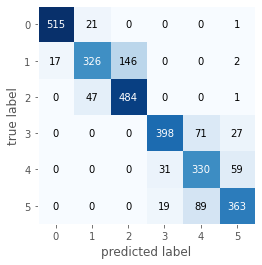

In [47]:
cm = confusion_matrix(Y_test, clf.predict(X_test_scaled))
print(clf.score(X_train_scaled, Y_train))

print(clf.score(X_test_scaled, Y_test))

plot_confusion_matrix(cm)

### RandomForest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200)
classifier.fit(X_train_scaled, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Let's see the confusion matrix first 

1.0
0.9239904988123515


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f081ee0a88>)

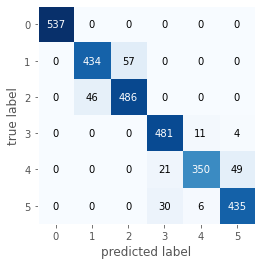

In [24]:
cm = confusion_matrix(Y_test, classifier.predict(X_test_scaled))
print(classifier.score(X_train_scaled, Y_train))

print(classifier.score(X_test_scaled, Y_test))

plot_confusion_matrix(cm)

### GradientBoosting Classifier

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train_scaled, Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### Let's see the confusion matrix first 

1.0
0.9399389209365456


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2c80b37cd48>)

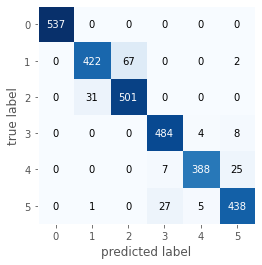

In [18]:
cm = confusion_matrix(Y_test, classifier.predict(X_test_scaled))
print(classifier.score(X_train_scaled, Y_train))

print(classifier.score(X_test_scaled, Y_test))

plot_confusion_matrix(cm)

### VotingClassifier 


In [38]:
from sklearn.ensemble import  VotingClassifier

clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=200, random_state=1)
clf3 = SVC(kernel ='rbf', random_state = 0)
classifier = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
classifier.fit(X_train_scaled, Y_train)



C:\Users\DR.LAP\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='multinomial',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=1, solver='lbfgs',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=Non...
                                        

#### Let's see the confusion matrix

0.9968715995647442
0.9582626399728538


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f081c5f788>)

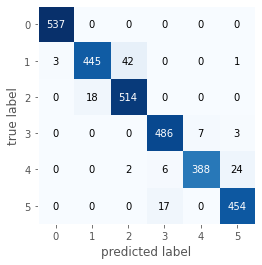

In [39]:
cm = confusion_matrix(Y_test, classifier.predict(X_test_scaled))
print(classifier.score(X_train_scaled, Y_train))

print(classifier.score(X_test_scaled, Y_test))

plot_confusion_matrix(cm)

### if voting = 'soft'

In [42]:

clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=200, random_state=1)
clf3 = SVC(kernel ='rbf', random_state = 0,probability=True)
classifier = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
classifier.fit(X_train_scaled, Y_train)



C:\Users\DR.LAP\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='multinomial',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=1, solver='lbfgs',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=Non...
                                        

#### Let's see the confusion matrix 

0.9974156692056583
0.9586019681031558


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f081ddfb08>)

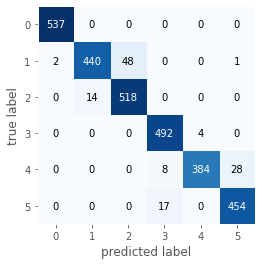

In [43]:
cm = confusion_matrix(Y_test, classifier.predict(X_test_scaled))
print(classifier.score(X_train_scaled, Y_train))

print(classifier.score(X_test_scaled, Y_test))

plot_confusion_matrix(cm)

#### Let's see the f1_score

In [50]:
from sklearn.metrics import f1_score
y_pred=classifier.predict(X_test_scaled)
f1_current= f1_score(Y_test,y_pred,average='macro')
print(f1_current)

0.9577568458066194


# The best accuracy is  VotingClassifier